# Steps of clustering research

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

x.shape

(150, 4)

# KMeans

## KMeans scaling

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
pca_scaler = PCA(n_components=4)

standard_scaler.fit(x)
minmax_scaler.fit(x)
pca_scaler.fit(x)

standard_x = standard_scaler.transform(x)
minmax_x = minmax_scaler.transform(x)
pca_x = pca_scaler.transform(x)

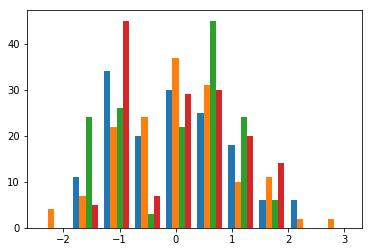

In [3]:
plt.hist(standard_x)
plt.show()

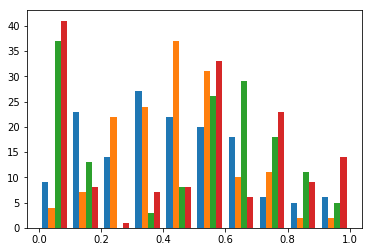

In [4]:
plt.hist(minmax_x)
plt.show()

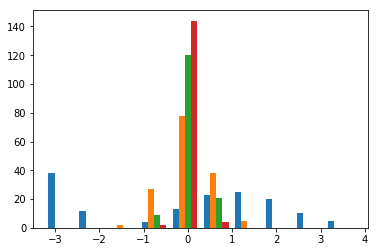

In [5]:
plt.hist(pca_x)
plt.show()

## KMeans - choose the number of cluster - Elbow method 

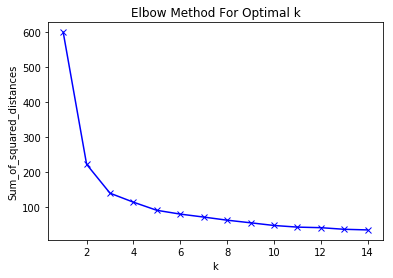

In [6]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(standard_x)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

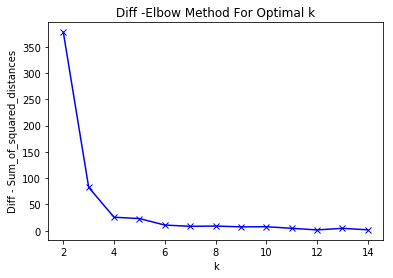

In [7]:
Diff_Sum_of_squared_distances = pd.Series(Sum_of_squared_distances)
Diff_Sum_of_squared_distances = Diff_Sum_of_squared_distances.diff().abs()#.diff().abs()
Diff_Sum_of_squared_distances.dropna(inplace=True)


plt.plot(K[1:], Diff_Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Diff - Sum_of_squared_distances')
plt.title('Diff -Elbow Method For Optimal k')
plt.show()

#Diff_Sum_of_squared_distances

## KMeans - make cluster

In [8]:
km = KMeans(n_clusters=6)
km = km.fit(standard_x)
y_pred = km.predict(standard_x)
cluster_center = km.cluster_centers_

## KMeans - PAC & Checking the results

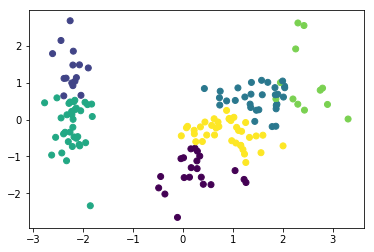

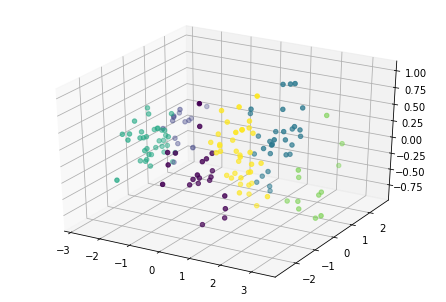

In [9]:
#check result using PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,alpha=1)
plt.show()

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)
plt.show()

In [10]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [11]:
cluster_data = pd.DataFrame(x)
cluster_data['cluster'] = y_pred

In [12]:
cluster_data.head(n=7)

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,3


In [13]:
group_0 = cluster_data[cluster_data.cluster == 0]

In [14]:
group_0.head()

,0,1,2,3,cluster
53,5.5,2.3,4.0,1.3,0
57,4.9,2.4,3.3,1.0,0
59,5.2,2.7,3.9,1.4,0
60,5.0,2.0,3.5,1.0,0
62,6.0,2.2,4.0,1.0,0
